## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Выполнил: <font color='red'>Никольский Владимир Андреевич, ВМК МГУ</font>

### Тема: Основы анализа данных и машинного обучения

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   27 марта 2023

**Дедлайн**:   21:00 9 апреля 2023

**Среда выполнения**: Jupyter Notebook (Python 3.7+)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

In [8]:
! python --version

Python 3.7.5


#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [10]:
def task_1(arr):
    return np.all(arr > 0)

In [11]:
def test_task_1():
    assert task_1(np.array([1, 2, 3])) == True
    assert task_1(np.array([0, 1, 2])) == False
    assert task_1(np.array([-1, 1, 2])) == False
    
    print('OK')

test_task_1()

OK


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [12]:
def task_2(arr, n):
    return np.repeat(arr, repeats=n)

In [13]:
print(task_2(np.array([1, 2, 3]), 3))

[1 1 1 2 2 2 3 3 3]


In [14]:
def test_task_2():
    assert np.array_equal(task_2(np.array([1, 2, 3]), 3), np.array([1, 1, 1, 2, 2, 2, 3, 3, 3]))
    assert np.array_equal(task_2(np.array([4, 5]), 2), np.array([4, 4, 5, 5]))
    assert np.array_equal(task_2(np.array([6]), 4), np.array([6, 6, 6, 6]))

    print('OK')

test_task_2()

OK


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [15]:
def task_3(V, v):
    idx = np.cumsum(v)
    sums = np.cumsum(V)
    result = sums[idx - 1]
    result[1:] -= result[:-1]
    return result

In [16]:
def test_task_3():
    _V = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    _v = np.array([2, 1, 3])
    assert np.array_equal(task_3(_V, _v), [3, 3, 15])

    _V = [5]
    _v = [1]
    assert np.array_equal(task_3(_V, _v), [5])

    _V = [0, 0, 0, 0, 0, 0, 0, 0]
    _v = [2, 2, 2, 2]
    assert np.array_equal(task_3(_V, _v), [0, 0, 0, 0])

    _V = [0]
    _v = [1]
    assert np.array_equal(task_3(_V, _v), [0])
    
    print('OK')

test_task_3()

OK


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [17]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_id', 'label_name'],
                           data=[(i, e) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1 балл):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

Train count: 11314
Test count: 7532


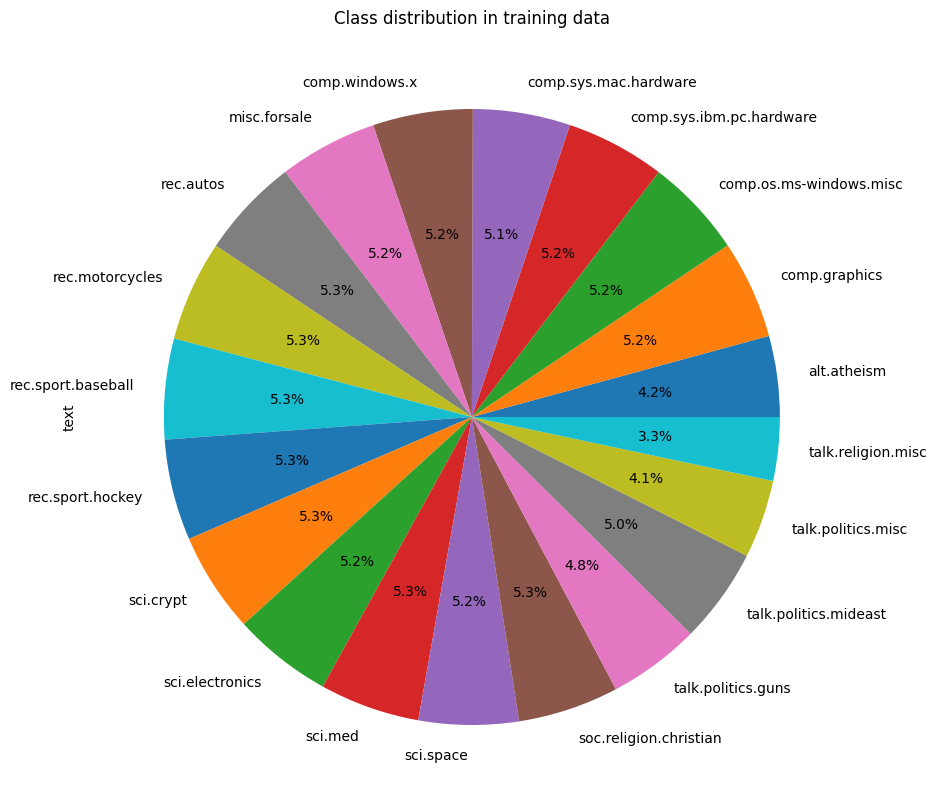

In [18]:
data = pd.merge(data, label_names, on='label_id')
data.drop('label_id', axis=1, inplace=True)

train_count = data['is_train'].value_counts()[True]
test_count = data['is_train'].value_counts()[False]
print(f"Train count: {train_count}")
print(f"Test count: {test_count}")

train_data = data[data['is_train'] == True]
train_data.groupby('label_name').count()['text'].plot(
    kind='pie', figsize=(10, 10), autopct='%1.1f%%')
plt.title('Class distribution in training data')
plt.show()

__Задание 5 (2 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [19]:
import re

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[\n\t\r]', ' ', text)
    text = re.sub(r'[^a-z ]', ' ', text)
    words = [w for w in text.split(' ') if w != '']
    return words

data['pp_text'] = data['text'].apply(preprocess)

In [20]:
data

,text,is_train,label_name,pp_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos,"[from, lerxst, wam, umd, edu, where, s, my, th..."
1,From: CPKJP@vm.cc.latech.edu (Kevin Parker)\nS...,True,rec.autos,"[from, cpkjp, vm, cc, latech, edu, kevin, park..."
2,From: jimf@centerline.com (Jim Frost)\nSubject...,True,rec.autos,"[from, jimf, centerline, com, jim, frost, subj..."
3,From: eliot@lanmola.engr.washington.edu (eliot...,True,rec.autos,"[from, eliot, lanmola, engr, washington, edu, ..."
4,From: sjp@hpuerca.atl.hp.com (Steve Phillips)\...,True,rec.autos,"[from, sjp, hpuerca, atl, hp, com, steve, phil..."
...,...,...,...,...
18841,From: rja14@cl.cam.ac.uk (Ross Anderson)\nSubj...,False,sci.crypt,"[from, rja, cl, cam, ac, uk, ross, anderson, s..."
18842,From: wcs@anchor.ho.att.com (Bill Stewart +1-9...,False,sci.crypt,"[from, wcs, anchor, ho, att, com, bill, stewar..."
18843,From: dougb@comm.mot.com (Doug Bank)\nSubject:...,False,sci.crypt,"[from, dougb, comm, mot, com, doug, bank, subj..."
18844,From: ed@titipu.resun.com (Edward Reid)\nSubje...,False,sci.crypt,"[from, ed, titipu, resun, com, edward, reid, s..."


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите график (plot) частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

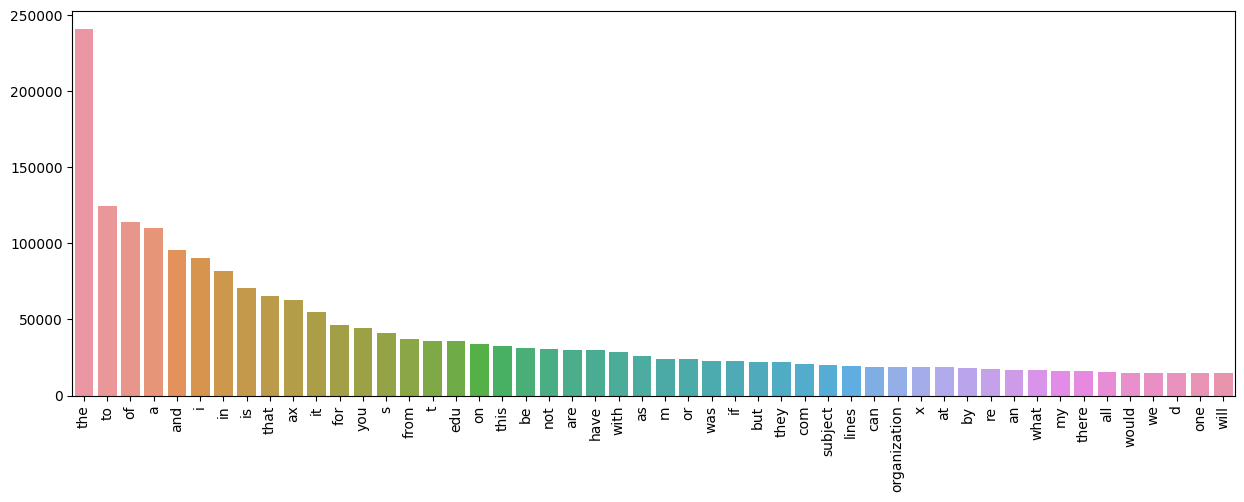

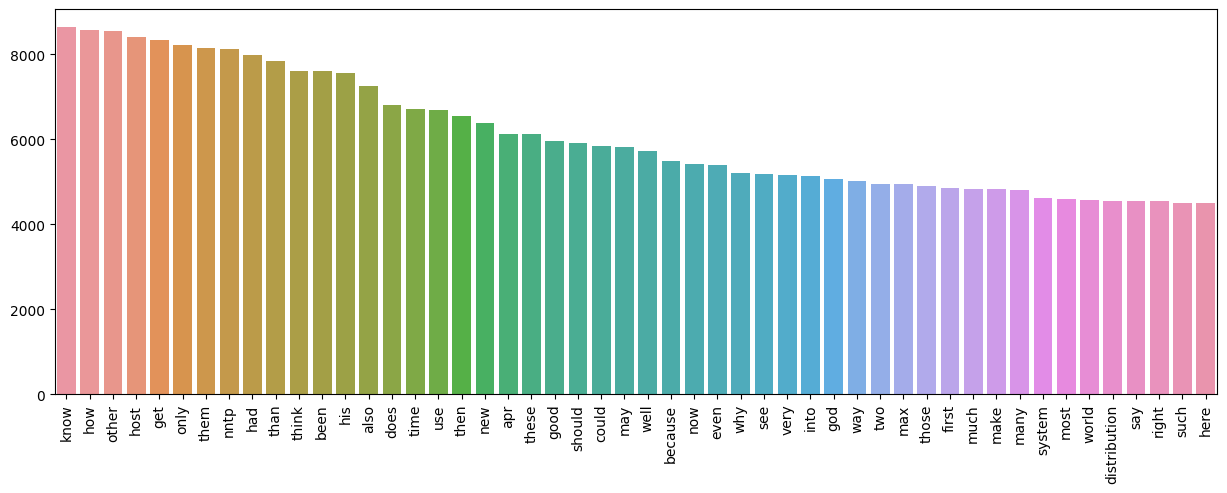

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

vocab = Counter()
for text in data['pp_text']:
    vocab.update(text)
    
plt.figure(figsize=(15, 5))
sns.barplot(x=[word for word, count in vocab.most_common(50)], y=[count for word, count in vocab.most_common(50)])
plt.xticks(rotation=90)
plt.show()

vocab_filtered = Counter({word: count for word, count in vocab.items() if
                          count <= 9000 and count >= 3 and len(word) >= 3 and len(word) <= 20 and len(set(word)) != 1})

plt.figure(figsize=(15, 5))
sns.barplot(x=[word for word, count in vocab_filtered.most_common(50)], y=[count for word, count in vocab_filtered.most_common(50)])
plt.xticks(rotation=90)
plt.show()

__Задание 7 (1.5 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

def join_text(text):
    return ' '.join(text)

X_train = data[data['is_train'] == True]['pp_text'].apply(join_text)
X_test = data[data['is_train'] == False]['pp_text'].apply(join_text)

vectorizer = CountVectorizer()
vectorizer.fit_transform(vocab)
X_train = vectorizer.transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

assert len(vectorizer.vocabulary_) == len(vectorizer.vocabulary_)

In [23]:
X_train.shape

(11314, 115039)

In [24]:
X_test.shape

(7532, 115039)

__Задание 8 (1.5 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV


clf = LogisticRegression()

y_train = data[data['is_train'] == True]['label_name']
y_test = data[data['is_train'] == False]['label_name']

grid = {'C': [0.1, 0.2, 0.3, 1]}
grid_search = GridSearchCV(clf, grid, cv=5)
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']

clf = LogisticRegression(random_state=42, max_iter=1000, C=best_C)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"F1-micro: {f1_micro}")
print(f"F1-macro: {f1_macro}")

KeyboardInterrupt: 

__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

Classes 'aas' and 'aaron' are frequently confused.


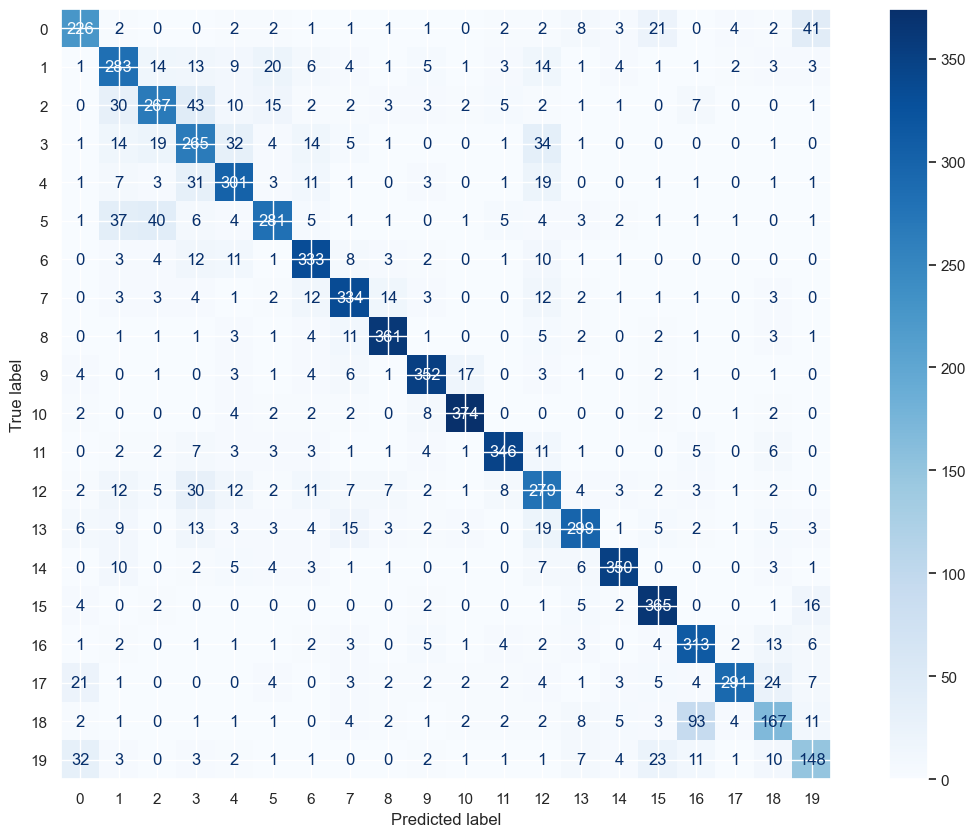

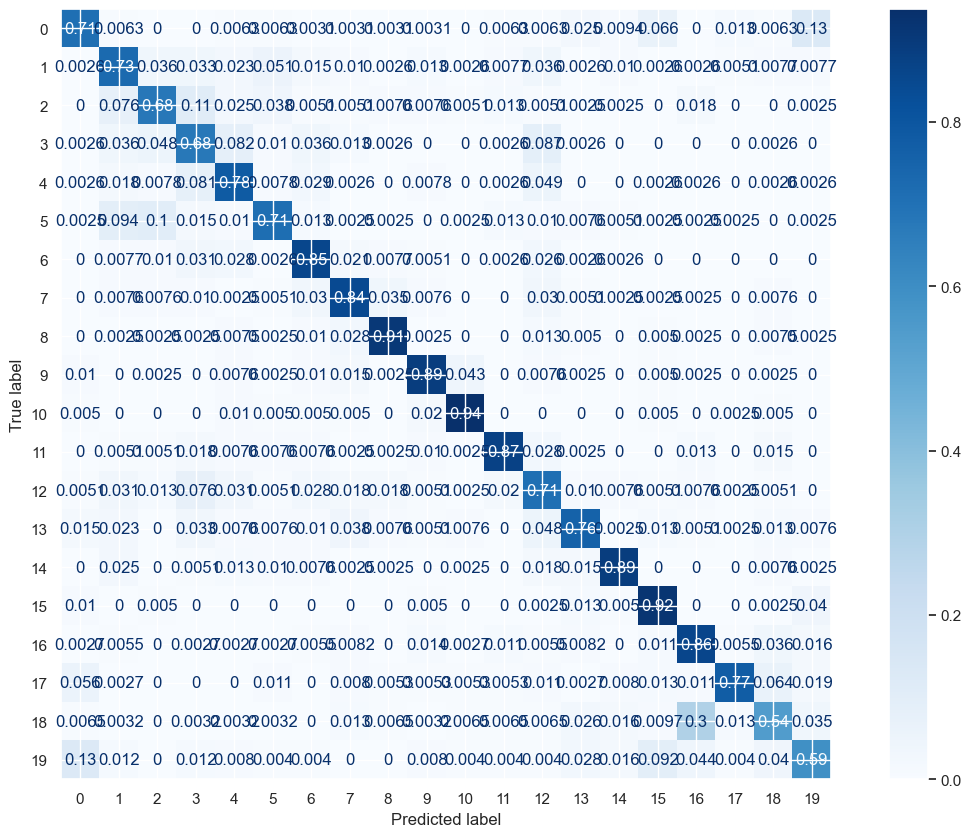

In [106]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(clf, X_test_vec, y_test, cmap=plt.cm.Blues, normalize=None)

plot_confusion_matrix(clf, X_test_vec, y_test, cmap=plt.cm.Blues, normalize='true')

max_errors = cm - np.diagflat(np.diag(cm))
max_errors_coords = np.argwhere(max_errors == np.max(max_errors))

classes = vectorizer.get_feature_names()
for coords in max_errors_coords:
    class1 = classes[coords[0]]
    class2 = classes[coords[1]]
    print(f"Classes '{class1}' and '{class2}' are frequently confused.")

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [1]:
from xgboost import XGBClassifier as xgb

X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

xgb_model = xgb.XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5)

grid_search.fit(X_train_vec, y_train)

best_params = grid_search.best_params_

xgb_model = xgb.XGBClassifier(
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate']
)

xgb_model.fit(X_train_vec, y_train)

y_pred = xgb_model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"F1-micro: {f1_micro}")
print(f"F1-macro: {f1_macro}")

NameError: name 'vectorizer' is not defined

__Задание 11 (3 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [ ]:
def task_11():
    pass

__Задание 12 (3 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

In [ ]:
from networkx import Graph
from networkx.algorithms import community

def task_12():
    # community.greedy_modularity_communities(...)
    pass